In [1]:
import tensorflow as tf

In [2]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [58]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [3]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

228827136/228813984 [==============================] - 7s 0us/step


In [4]:
flowers_root

PosixPath('/home/ahmed/.keras/datasets/flower_photos')

In [5]:
for item in flowers_root.glob("*"):
  print(item.name)

dandelion
sunflowers
LICENSE.txt
tulips
daisy
roses


In [6]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [7]:
for f in list_ds.take(5):
  print(f.numpy())

b'/home/ahmed/.keras/datasets/flower_photos/daisy/9345273630_af3550031d.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/tulips/14094114202_4c1d7f1116.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/sunflowers/5223643767_d8beb7e410.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/daisy/15327813273_06cdf42210.jpg'
b'/home/ahmed/.keras/datasets/flower_photos/tulips/13531001134_72052100e1_m.jpg'


In [8]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [9]:
labeled_ds

<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [10]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02'

b'roses'


In [23]:
inc_dataset = tf.data.Dataset.range(105)
dec_dataset = tf.data.Dataset.range(0, -105, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)
print(batched_dataset.element_spec)
for batch in batched_dataset.take(110):
  print([arr.numpy() for arr in batch])

(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]
[array([16, 17, 18, 19]), array([-16, -17, -18, -19])]
[array([20, 21, 22, 23]), array([-20, -21, -22, -23])]
[array([24, 25, 26, 27]), array([-24, -25, -26, -27])]
[array([28, 29, 30, 31]), array([-28, -29, -30, -31])]
[array([32, 33, 34, 35]), array([-32, -33, -34, -35])]
[array([36, 37, 38, 39]), array([-36, -37, -38, -39])]
[array([40, 41, 42, 43]), array([-40, -41, -42, -43])]
[array([44, 45, 46, 47]), array([-44, -45, -46, -47])]
[array([48, 49, 50, 51]), array([-48, -49, -50, -51])]
[array([52, 53, 54, 55]), array([-52, -53, -54, -55])]
[array([56, 57, 58, 59]), array([-56, -57, -58, -59])]
[array([60, 61, 62, 63]), array([-60, -61, -62, -63])]
[array([64, 65, 66, 67]), a

In [3]:
df = pd.read_csv("/home/ahmed/work/atopiWork/atopiCodes/preprocessing/csvs/patientNumber_imName_DegradationRate.csv")

In [4]:
df

,Unnamed: 0,patientNumber,imagePath,degradationRate
0,0,357290,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,5
1,1,976845,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3
2,2,1012164,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3
3,3,768041,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,3
4,4,909121,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
...,...,...,...,...
1346,1346,529589,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,4
1347,1347,935352,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2
1348,1348,476072,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,1
1349,1349,212879,/home/ahmed/work/atopiWork/atopiImagesSkinOnly...,2


In [47]:
imSizeX, imSizeY = IMG_SIZE
def parse_image(filename, label):
  #parts = tf.strings.split(filename, os.sep)
  #label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [imSizeX, imSizeY])
  return image, label

In [33]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [34]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

In [42]:
image.shape

TensorShape([128, 128, 3])

In [43]:
label

<tf.Tensor: shape=(), dtype=string, numpy=b'sunflowers'>

In [6]:
imFilePaths = df["imagePath"].to_numpy()

In [7]:
imFileLabels = df["degradationRate"].to_numpy()

In [48]:
imFileLabels.shape, imFilePaths.shape

((1351,), (1351,))

In [119]:
dataset = tf.data.Dataset.from_tensor_slices((imFilePaths, imFileLabels))

In [50]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [120]:
dataset = dataset.map(parse_image, num_parallel_calls=4)

In [69]:
dataset

<BatchDataset shapes: ((None, 224, 224, None), (None,)), types: (tf.float32, tf.int64)>

In [53]:
dataset.element_spec

(TensorSpec(shape=(224, 224, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [121]:
#dataset = dataset.batch(BATCH_SIZE)

In [60]:
image, label = next(iter(dataset))

In [70]:
image.shape

TensorShape([32, 224, 224, 3])

In [62]:
label

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([5, 3, 3, 3, 1, 1, 2, 1, 1, 2, 3, 4, 3, 1, 3, 1, 2, 2, 2, 3, 1, 1,
       5, 4, 3, 2, 2, 1, 1, 1, 3, 1])>

In [64]:
plt.close()

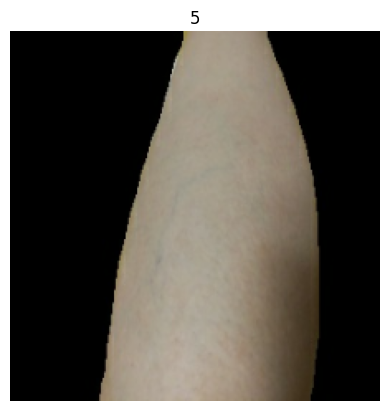

In [65]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy())
  plt.axis('off')
  plt.show()  

show(image[0], label[0])

In [122]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    print("train size", train_size)
    val_size = int(val_split * ds_size)
    print("val size", val_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [123]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(ds=dataset, ds_size=1351)

train size 1080
val size 135


In [132]:
def convertToBatch(datasets, batchSize=32):
    #for dataset in datasets:
    return dataset.batch(batchSize)

In [144]:
train_ds=convertToBatch(train_ds)
val_ds=convertToBatch(val_ds)
test_ds=convertToBatch(test_ds)

In [146]:
for images, labels in val_ds.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', labels.shape)

images.shape:  (32, 224, 224, 3)
labels.shape:  (32,)


In [139]:
train_ds.element_spec

(TensorSpec(shape=(None, 224, 224, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [147]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)

In [148]:
validation_dataset = val_ds.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_ds.prefetch(buffer_size=AUTOTUNE)

In [73]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [74]:
result = data_augmentation(image)

In [77]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [78]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [79]:
#IMG_SIZE=(256,256)
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [141]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


#### Feature extraction

In [81]:
base_model.trainable = False

In [82]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [83]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [84]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [107]:
imx, imy =IMG_SIZE
inputs = tf.keras.Input(shape=(imx,imy , 3))
#x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [149]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_squared_error'])

In [109]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [110]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                    

#### Train the model

In [95]:
im, l = next(iter(train_dataset))

In [150]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

43/43 [==============================] - 1s 16ms/step - loss: 1.2720 - mean_squared_error: 1.2720


In [151]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
43/43 [==============================] - 3s 32ms/step - loss: 1.2334 - mean_squared_error: 1.2334 - val_loss: 1.2301 - val_mean_squared_error: 1.2301
Epoch 2/10
43/43 [==============================] - 1s 32ms/step - loss: 1.2308 - mean_squared_error: 1.2308 - val_loss: 1.2299 - val_mean_squared_error: 1.2299
Epoch 3/10
43/43 [==============================] - 1s 32ms/step - loss: 1.2309 - mean_squared_error: 1.2309 - val_loss: 1.2298 - val_mean_squared_error: 1.2298
Epoch 4/10
43/43 [==============================] - 1s 32ms/step - loss: 1.2309 - mean_squared_error: 1.2309 - val_loss: 1.2298 - val_mean_squared_error: 1.2298
Epoch 5/10
43/43 [==============================] - 1s 32ms/step - loss: 1.2309 - mean_squared_error: 1.2309 - val_loss: 1.2297 - val_mean_squared_error: 1.2297
Epoch 6/10
43/43 [==============================] - 1s 32ms/step - loss: 1.2308 - mean_squared_error: 1.2308 - val_loss: 1.2297 - val_mean_squared_error: 1.2297
Epoch 7/10
43/43 [================

In [156]:
plt.close()

#### Learning curves

In [154]:
history.history

{'loss': [1.2333778142929077,
  1.2308160066604614,
  1.230926275253296,
  1.2309075593948364,
  1.2308698892593384,
  1.230828881263733,
  1.2307871580123901,
  1.23074471950531,
  1.23070228099823,
  1.2306599617004395],
 'mean_squared_error': [1.2333778142929077,
  1.2308160066604614,
  1.230926275253296,
  1.2309075593948364,
  1.2308698892593384,
  1.230828881263733,
  1.2307871580123901,
  1.23074471950531,
  1.23070228099823,
  1.2306599617004395],
 'val_loss': [1.2301486730575562,
  1.2298517227172852,
  1.2298038005828857,
  1.2297600507736206,
  1.2297163009643555,
  1.2296727895736694,
  1.2296292781829834,
  1.2295862436294556,
  1.22954261302948,
  1.2294995784759521],
 'val_mean_squared_error': [1.2301486730575562,
  1.2298517227172852,
  1.2298038005828857,
  1.2297600507736206,
  1.2297163009643555,
  1.2296727895736694,
  1.2296292781829834,
  1.2295862436294556,
  1.22954261302948,
  1.2294995784759521]}

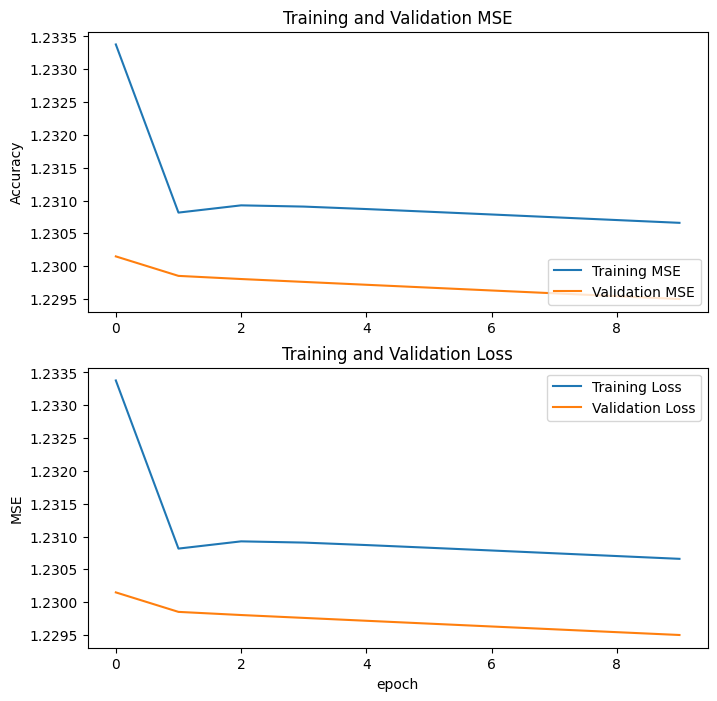

In [157]:
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training MSE')
plt.plot(val_acc, label='Validation MSE')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation MSE')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('MSE')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Fine Tuning

In [158]:
base_model.trainable = True

In [159]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [160]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_squared_error'])

In [161]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                    

In [162]:
len(model.trainable_variables)

56

In [164]:
fine_tune_epochs = 100
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/110
43/43 [==============================] - 2s 40ms/step - loss: 1.2821 - mean_squared_error: 1.2821 - val_loss: 1.2542 - val_mean_squared_error: 1.2542
Epoch 11/110
43/43 [==============================] - 2s 39ms/step - loss: 1.2815 - mean_squared_error: 1.2815 - val_loss: 1.2609 - val_mean_squared_error: 1.2609
Epoch 12/110
43/43 [==============================] - 2s 39ms/step - loss: 1.2874 - mean_squared_error: 1.2874 - val_loss: 1.2734 - val_mean_squared_error: 1.2734
Epoch 13/110
43/43 [==============================] - 2s 39ms/step - loss: 1.2923 - mean_squared_error: 1.2923 - val_loss: 1.2687 - val_mean_squared_error: 1.2687
Epoch 14/110
43/43 [==============================] - 2s 39ms/step - loss: 1.2904 - mean_squared_error: 1.2904 - val_loss: 1.2569 - val_mean_squared_error: 1.2569
Epoch 15/110
43/43 [==============================] - 2s 39ms/step - loss: 1.2864 - mean_squared_error: 1.2864 - val_loss: 1.2676 - val_mean_squared_error: 1.2676
Epoch 16/110
43/43 [==

In [166]:
acc += history_fine.history['mean_squared_error']
val_acc += history_fine.history['val_mean_squared_error']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [171]:
plt.close()

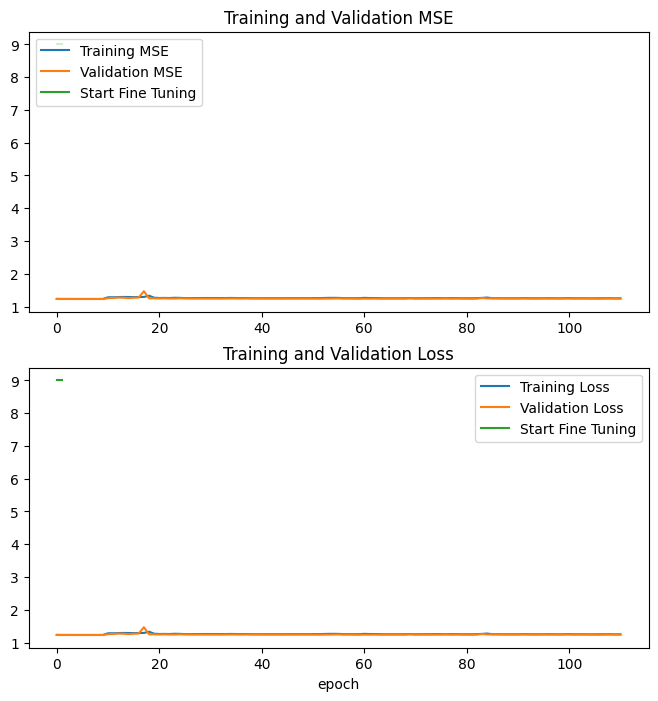

In [172]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training MSE')
plt.plot(val_acc, label='Validation MSE')
#plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1], label='Start Fine Tuning')
# plt.ylim()
plt.legend(loc='upper left')
plt.title('Training and Validation MSE')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],label='Start Fine Tuning')
#plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()